# Homework 4

## Credit Card Data from book "Econometric Analysis"

- Raw data link: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [4]:
df.shape

(1319, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [6]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

### Preparation

- Create the target variable by mapping yes to 1 and no to 0.
- Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [7]:
df['owner'].value_counts()

no     738
yes    581
Name: owner, dtype: int64

In [8]:
df['selfemp'].value_counts()

no     1228
yes      91
Name: selfemp, dtype: int64

In [9]:
df['card'].value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [10]:
df['card']

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
1314    yes
1315     no
1316    yes
1317    yes
1318    yes
Name: card, Length: 1319, dtype: object

In [11]:
df['card'] = df['card'].map(dict(yes=1, no=0))

In [12]:
df['card']

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['card']
y_val = df_val['card']
y_test = df_test['card']

del df_train['card']
del df_val['card']
del df_test['card']

In [15]:
df_train.shape, df_val.shape, df_test.shape

((791, 11), (264, 11), (264, 11))

In [16]:
y_train

0      0
1      0
2      1
3      1
4      1
      ..
786    1
787    0
788    1
789    1
790    0
Name: card, Length: 791, dtype: int64

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the card variable.
- Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- reports
- dependents
- active
- share

Feature importance calculation by using roc_auc_score

In [17]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical = list(df_train.select_dtypes(include=np.number))

print(categorical)
print(numerical)

['owner', 'selfemp']
['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']


In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
for n in numerical:
    feature_importance = roc_auc_score(y_train, df_train[n])
    
    if feature_importance < 0.5:
        feature_importance = roc_auc_score(y_train, -df_train[n])
    
    print(f'Score for {n} is {feature_importance}')

Score for reports is 0.7166629860689376
Score for age is 0.5240020979407055
Score for income is 0.5908049467233478
Score for share is 0.989183643423692
Score for expenditure is 0.991042345276873
Score for dependents is 0.5327757227773791
Score for months is 0.5294217780967629
Score for majorcards is 0.5343859842838476
Score for active is 0.6043173411362006


'share' feature has the highest AUC between four of them

### Training the model

From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [20]:
df_train.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [21]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)

In [22]:
X_train

array([[1.700000e+01, 4.050000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.990431e-04],
       [4.000000e+00, 3.233333e+01, 4.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.000000e-04],
       [7.000000e+00, 2.916667e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.820546e-02],
       ...,
       [1.000000e+00, 2.475000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 8.070774e-02],
       [7.000000e+00, 5.691667e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 6.289540e-02],
       [8.000000e+00, 2.458333e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 5.454546e-04]])

Logistic Regression

In [23]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [24]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
card_decision = (y_pred >= 0.5)
np.round((y_val == card_decision).mean(), 3)

0.97

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995

In [25]:
print(np.round(roc_auc_score(y_val, y_pred),3))

0.995


## Question 3

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

- 0.1
- 0.3
- 0.6
- 0.8

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
thresholds = np.arange(0.0, 1.0, 0.01)

scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [28]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [29]:
# Adding Precision to df_scores,   Precision =  TP / TP + FP
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)

# Adding Recall to df_scores,   Recall = TP / TP + FN

df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [30]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,211,53,0,0,0.799242,1.000000
10,0.1,210,17,1,36,0.925110,0.995261
20,0.2,207,5,4,48,0.976415,0.981043
30,0.3,205,5,6,48,0.976190,0.971564
40,0.4,205,1,6,52,0.995146,0.971564
50,0.5,204,1,7,52,0.995122,0.966825
60,0.6,204,1,7,52,0.995122,0.966825
70,0.7,204,1,7,52,0.995122,0.966825
80,0.8,204,1,7,52,0.995122,0.966825
90,0.9,204,0,7,53,1.000000,0.966825


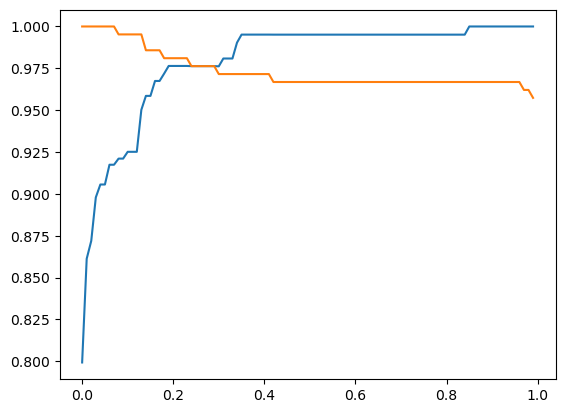

In [31]:
plt.plot(df_scores.threshold, df_scores['precision'])
plt.plot(df_scores.threshold, df_scores['recall'])

The answer is 0.3

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing :   F1 = 2.(P.R)/(P+R)

 

Where  is precision and  is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- 0.4
- 0.6
- 0.7

In [32]:
thresholds = np.arange(0.0, 1.0, 0.01)

scores_f1 = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    f1 = (2* (tp/(tp+fp)) * (tp/(tp+fn))) / (tp/(tp+fp)) + (tp/(tp+fn))

    scores_f1.append((t, tp, fp, fn, tn, f1))

In [34]:
columns_f1 = ['threshold', 'tp', 'fp', 'fn', 'tn','f1']
df_scores_f1 = pd.DataFrame(scores_f1, columns=columns_f1)

In [42]:
df_scores_f1[::].T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
threshold,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.080000,0.090000,...,0.900000,0.910000,0.920000,0.930000,0.940000,0.950000,0.960000,0.970000,0.980000,0.990000
tp,211.0,211.00,211.00,211.00,211.00,211.00,211.00,211.00,210.000000,210.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,203.000000,203.000000,202.000000
fp,53.0,34.00,31.00,24.00,22.00,22.00,19.00,19.00,18.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fn,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000
tn,0.0,19.00,22.00,29.00,31.00,31.00,34.00,34.00,35.000000,35.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
f1,3.0,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.985782,2.985782,...,2.900474,2.900474,2.900474,2.900474,2.900474,2.900474,2.900474,2.886256,2.886256,2.872038


In [38]:
df_scores_f1['f1'].unique()

array([3.        , 2.98578199, 2.95734597, 2.94312796, 2.92890995,
       2.91469194, 2.90047393, 2.88625592, 2.87203791])

## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

- 0.003
- 0.014
- 0.09
- 0.24

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
def train(df,y):
    
    train_dict = df.to_dict(orient = "records")

    dv = DictVectorizer(sparse=False)
    x_train = dv.fit_transform(train_dict)

    model = LogisticRegression()
    model.fit(x_train, y)

    return dv, model

In [45]:
def predict(df,dv, model):
    
    var_dict = df.to_dict(orient = "records")
  
    x = dv.transform(var_dict)
    y_pred = model.predict_proba(x)[:,1]

    return y_pred

In [46]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [47]:
k_scores = []

for train_idx,val_idx in kfold.split(df_full_train):
    
  
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    del df_train['card']
    del df_val['card']

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    k_scores.append(auc)

C:\Users\uuror\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\uuror\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [48]:
round(np.mean(k_scores),3), round(np.std(k_scores), 3)

(0.997, 0.003)

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [53]:
def train(df, y, C=1.0):
    
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [54]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [55]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01 0.995 +- 0.004
C=0.1 0.997 +- 0.003
C=1 0.996 +- 0.003
C=10 0.997 +- 0.003


For values of 0.1 and 1 of C got the same score and std also same. So we select the lowest C value which is 0.1